# 環境構築
```
conda create -n seminar keras scikit-learn matplotlib pandas pillow jupyter
activate seminar
jupyter notebook
```
GPU 環境では、仮想環境作成時に tensorflow-gpu も合わせて指定すること。

## scikit-learn を用いた分析

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [3]:
X = data['data']
y = data['target']
X.shape, y.shape

((442, 10), (442,))

In [4]:
X[:5, :]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [5]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.5177494254132934

In [7]:
y_pred = model.predict(X)

Text(0, 0.5, 'Prediction')

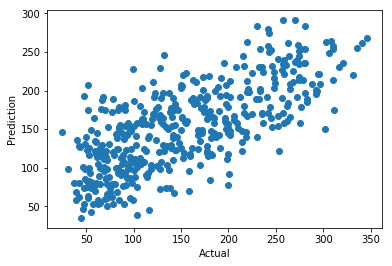

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')

In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y, y_pred))

53.47607314274362

In [10]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [11]:
model.intercept_

152.1334841628965

$y_{pred} = 152.1 - 10.0 \times x_1 -239.8 \times x_2 + \cdots + 67.6 \times x_{10}$

## Keras を用いた分析

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [13]:
model = Sequential()
model.add(Dense(1, input_shape=(10,)))
opt = SGD()
model.compile(loss='mean_squared_error', optimizer=opt)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.fit(X, y, epochs=1000, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [15]:
y_pred = model.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

56.8092318359833

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.get_weights()

[array([[  46.39039  ],
        [ -57.98505  ],
        [ 311.39447  ],
        [ 212.16049  ],
        [  25.351364 ],
        [  -7.9717712],
        [-169.37848  ],
        [ 141.88411  ],
        [ 270.33044  ],
        [ 139.90031  ]], dtype=float32), array([152.0165], dtype=float32)]

$y_{pred} = 152.1 + 46.4 \times x_1 - 58.0 \times x_2 + \cdots + 139.9 \times x_{10}$